In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sc
import sympy as sp

In [3]:
datos = "../data/FluidosPerfo.csv"
flu = pd.read_csv(datos, skiprows=[0,1], index_col=0)
r = np.array(flu.index)
t = np.array(flu.TAU)


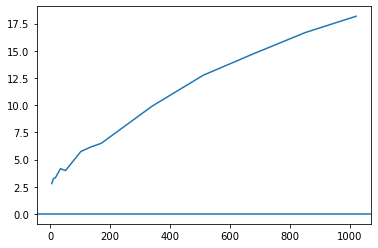

In [9]:
#Bingham
x, y = sp.symbols('x y')
m = sp.diff(.0154*x + 3.64, x)
plt.plot(r,t)
plt.axhline(y=m, xmin=0, xmax=1000)

4*x

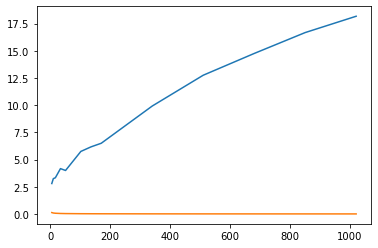

In [17]:
#Exponencial
x, y = sp.symbols('x y')
mexpo = sp.diff(0.66*x**0.473, x)
expo = (0.31218/(r**0.527))
plt.plot(r,t)
plt.plot(r,expo)

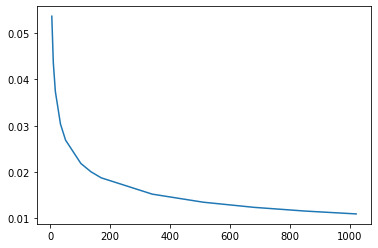

In [137]:
#Exponencial mejorado
x, y = sp.symbols('x y')
mexpom = sp.diff(2.4 + 0.125*(x**0.700), x)
expom = (0.0875/(r**0.3))

#plt.plot(r,t)
plt.plot(r,expom)


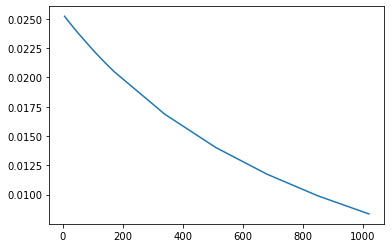

In [20]:
#Logarítmico
x, y = sp.symbols('x y')
mlog = sp.diff((-8.425e-06*0.00099*x + (8.425e-06 + 0.0254*0.00099)*sp.log((1+0.00099*x)**2)/2)/0.00099**2 +2.945, x)
log = (17.126*(1.9602*(10**-6)*r+0.00198))/((0.00099*r+1)**2)-0.00851

#plt.plot(r,t)
plt.plot(r,log)

(0.0, 0.06)

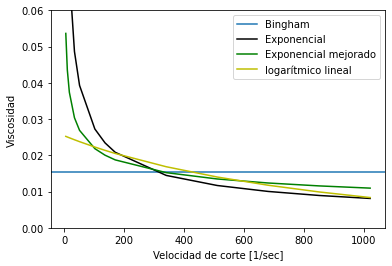

In [139]:
plt.axhline(y=m, xmin=0, xmax=1000, label="Bingham")
plt.plot(r,expo, "k", label="Exponencial")
plt.plot(r,expom, "g", label="Exponencial mejorado")
plt.plot(r,log, "y", label="logarítmico lineal")
plt.legend()
plt.xlabel("Velocidad de corte [1/sec]")
plt.ylabel("Viscosidad")
plt.ylim(0, 0.06)